## Retail_Data_Analysis
Restail data will be used for analysis for store XYZ.
<br>Raw data set has 2009 sales records which is available month wise for some random dates.
<br>Each available dates having multiple zip data file for different outlets of store XYZ.

<b> Process involves</b> - Data extraction , Data cleaning , Data analysis, Visualization

This Data anaysis covers below mentioned questions

Q.1 Which month most number of order taken place in 2009 ?
<br>Q.2.a - Top 10 product which sold most by OnHand & OnOrder ? 
<br>Q.2.b - Top 10 product which sold least by OnHand & OnOrder ?
<br>Q.3 In 2009 which storeId did highest sales ?


## Data Extraction
### 1. Read all .txt.gz files from multiple folders
### Create final dump(RawData.txt) and save into local drive

In [1]:
import gzip
import os
import numpy as np
import csv
import pandas as pd

# take current dir
thisdir =  os.getcwd()
print(thisdir)
file3 = ""
        
# r=root, d=directories, f = files # serach for keyword ".txt.gz" in current dir
for r, d, f in os.walk(thisdir):
    for tarfile in f:
        if tarfile.endswith(".txt.gz"):
            # save the path of all .txt.gz file into tarfile2
            tarfile2 = os.path.join(r, tarfile)
            #print(tarfile)
            #print(tarfile2)
            # unzip each .txt.gz 
            with gzip.open(tarfile2, 'rt') as f1:
                # read each .txt and save to file2
                file2 = f1.read()
            # concate each .txt content into file3 and make final dump
            file3 += file2

#print(file3)
# Save final dump into local drive
csv_file =  open('RawData.txt', 'wt')
csv_file.write(file3)
csv_file.close()

print("completed")

C:\Users\Indrajeet\AppData\Local\Programs\Python\Python38-32\Scripts
completed


### 2. Read Final dump (RawData.txt) for analysis

In [2]:
import pandas as pd
data = pd.read_csv("RawData.txt", sep='\t')
data.head(10)

,Date,StoreID,StoreName,ProductID,ProductName,Color,Size,Manufacturer,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock
0,2009-01-03,1,Contoso Seattle No.1 Store,6,Contoso 2G MP3 Player E200 Black,Black,1.6 x 0.4 x 3.7,"Contoso, Ltd",19,0,24,11.0000,60,43,76
1,2009-01-03,1,Contoso Seattle No.1 Store,29,Contoso 32GB Video MP3 Player M3200 White,White,1 x 1.6 x 3.7,"Contoso, Ltd",19,0,12,84.4900,58,11,97
2,2009-01-03,1,Contoso Seattle No.1 Store,31,Contoso 32GB Video MP3 Player M3200 Orange,Orange,2.6 x 2.5 x 0.6,"Contoso, Ltd",19,0,6,84.4900,63,17,111
3,2009-01-03,1,Contoso Seattle No.1 Store,51,WWI 2GB Pulse Smart pen M100 Blue,Blue,6 x 0.5 x 0.5,Wide World Importers,19,0,6,91.9500,79,12,86
4,2009-01-03,1,Contoso Seattle No.1 Store,54,WWI 4GB Video Recording Pen X200 Red,Red,5.1 x 2.4 x 3.9,Wide World Importers,23,4,18,98.0700,30,30,71
5,2009-01-03,1,Contoso Seattle No.1 Store,78,NT Wireless Bluetooth Stereo Headphones E302 S...,Silver,5.5x 6.5 x 2.5,Northwind Traders,19,0,6,18.6500,70,29,60
6,2009-01-03,1,Contoso Seattle No.1 Store,90,NT Wireless Transmitter and Bluetooth Headphon...,Silver,4.5 x 8.4 x 2.6,Northwind Traders,19,0,6,49.6900,25,47,83
7,2009-01-03,1,Contoso Seattle No.1 Store,93,WWI Stereo Bluetooth Headphones E1000 Blue,Blue,12.2 x 8.8 x 5.5,Wide World Importers,21,6,12,34.3600,30,23,68
8,2009-01-03,1,Contoso Seattle No.1 Store,102,WWI Wireless Bluetooth Stereo Headphones M270 ...,Silver,7 x 5 x 1.5,Wide World Importers,19,0,18,52.8800,42,42,102
9,2009-01-03,1,Contoso Seattle No.1 Store,113,WWI Wireless Transmitter and Bluetooth Headpho...,White,5.3 x 2 x 7.4,Wide World Importers,22,3,12,82.8300,31,49,101


In [3]:
#### check the number of rows and columns
data.shape

(1563666, 15)

In [4]:
## print all columns
print(data.columns)

Index(['Date', 'StoreID', 'StoreName', 'ProductID', 'ProductName', 'Color',
       'Size', 'Manufacturer', 'OnHandQuantity', 'OnOrderQuantity',
       'SafetyStockQuantity', 'UnitCost', 'DaysInStock', 'MinDayInStock',
       'MaxDayInStock'],
      dtype='object')


## Data Cleaning
### 3. Check & remove multiple header from dataframe

In [5]:
### Check duplicate hearder
dup_header = data[data.Date.astype(str).str.contains('Date') == True]
print(dup_header.count())
### total 15769 headers are present

Date                   15769
StoreID                15769
StoreName              15769
ProductID              15769
ProductName            15769
Color                  15769
Size                   15769
Manufacturer           15769
OnHandQuantity         15769
OnOrderQuantity        15769
SafetyStockQuantity    15769
UnitCost               15769
DaysInStock            15769
MinDayInStock          15769
MaxDayInStock          15769
dtype: int64


In [6]:
#### print duplicate headers
print(dup_header)

          Date  StoreID  StoreName  ProductID  ProductName  Color  Size  \
120      ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
257      ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
384      ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
504      ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
629      ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
...        ...      ...        ...        ...          ...    ...   ...   
1561230  ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
1561866  ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
1562404  ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
1562839  ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   
1563278  ﻿Date  StoreID  StoreName  ProductID  ProductName  Color  Size   

         Manufacturer  OnHandQuantity  OnOrderQuantity  SafetyStockQuantity  \
120      Manufacture

In [7]:
#### Remove duplicate header 
data_no_dupheader = data[data.StoreID.astype(str).str.contains('StoreID') == False]
data_no_dupheader.count()


Date                   1547897
StoreID                1547897
StoreName              1547897
ProductID              1547897
ProductName            1547897
Color                  1547897
Size                   1197699
Manufacturer           1547897
OnHandQuantity         1547897
OnOrderQuantity        1547897
SafetyStockQuantity    1547897
UnitCost               1547897
DaysInStock            1547897
MinDayInStock          1547897
MaxDayInStock          1547897
dtype: int64

In [8]:
### out of (1563666) ,(15769) duplicate header removed, now total rows are 1547897
data_no_dupheader.shape

(1547897, 15)

### 4. Filter unwanted columns.
select those coloumns which are required for data analysis.

In [9]:
sample_data = data_no_dupheader[["Date","StoreID","ProductID",'OnHandQuantity', 'OnOrderQuantity',
        'DaysInStock', 'MinDayInStock',
       'MaxDayInStock']]
sample_data.head()

,Date,StoreID,ProductID,OnHandQuantity,OnOrderQuantity,DaysInStock,MinDayInStock,MaxDayInStock
0,2009-01-03,1,6,19,0,60,43,76
1,2009-01-03,1,29,19,0,58,11,97
2,2009-01-03,1,31,19,0,63,17,111
3,2009-01-03,1,51,19,0,79,12,86
4,2009-01-03,1,54,23,4,30,30,71


In [10]:
### number of rows and columns
sample_data.shape

(1547897, 8)

### 5. Check for Null value

In [11]:
### No Null value found as it returned "False"
sample_data.isnull().values.any()

False

In [12]:
#### No Null value in any column
sample_data.isnull().any().any()

False

## Data Analysis
### Q. 1. Which month most number of order taken place in 2009?

In [13]:
sample_data.head()

,Date,StoreID,ProductID,OnHandQuantity,OnOrderQuantity,DaysInStock,MinDayInStock,MaxDayInStock
0,2009-01-03,1,6,19,0,60,43,76
1,2009-01-03,1,29,19,0,58,11,97
2,2009-01-03,1,31,19,0,63,17,111
3,2009-01-03,1,51,19,0,79,12,86
4,2009-01-03,1,54,23,4,30,30,71


In [26]:
##3 Create Month column 
sample_data['Month'] = sample_data['Date'].str.split('-').str[1]
sample_data.head()

<ipython-input-26-d208b979d6c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['Month'] = sample_data['Date'].str.split('-').str[1]


In [27]:
## Create "Total Order" column by adding onhand and onorder quantity.
## First change datatype to int of both onhand and onorder columns. 
sample_data["Total Order"]= sample_data["OnHandQuantity"].astype('int32') + sample_data["OnOrderQuantity"].astype('int32')
sample_data.head()

<ipython-input-27-25a93a779ccb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data["Total Order"]= sample_data["OnHandQuantity"].astype('int32') + sample_data["OnOrderQuantity"].astype('int32')


In [16]:
results = sample_data.groupby('Month').sum()
print(results["Total Order"])


Month
01    4470030
02    3719240
03    2983220
04    3022240
05    4193585
06    4000872
07    3585750
08    4554680
09    4138339
10    4258946
11    4189559
12    3778522
Name: Total Order, dtype: int32


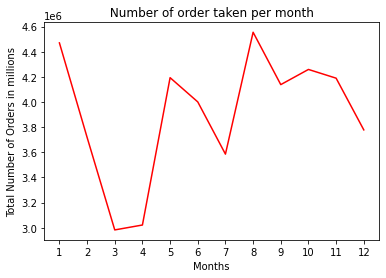

In [17]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.plot(months,results['Total Order'], color = 'r')
plt.xticks(months)

plt.xlabel('Months')
plt.ylabel("Total Number of Orders in millions")
plt.title(" Number of order taken per month ")
plt.show()



### Ans 1 - By observing above graph in January and August months most number of orders have done.

### Q.2 . Which top 10 products sold most and least by both onhand & onorder.

In [18]:
## create new sample dataframe as per required columns
sample_data2 = data_no_dupheader[["Date","StoreID","ProductID","ProductName",'OnHandQuantity', 'OnOrderQuantity',]]
sample_data2.head()

,Date,StoreID,ProductID,ProductName,OnHandQuantity,OnOrderQuantity
0,2009-01-03,1,6,Contoso 2G MP3 Player E200 Black,19,0
1,2009-01-03,1,29,Contoso 32GB Video MP3 Player M3200 White,19,0
2,2009-01-03,1,31,Contoso 32GB Video MP3 Player M3200 Orange,19,0
3,2009-01-03,1,51,WWI 2GB Pulse Smart pen M100 Blue,19,0
4,2009-01-03,1,54,WWI 4GB Video Recording Pen X200 Red,23,4


In [19]:
## checking colummns datatype
sample_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547897 entries, 0 to 1563665
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Date             1547897 non-null  object
 1   StoreID          1547897 non-null  object
 2   ProductID        1547897 non-null  object
 3   ProductName      1547897 non-null  object
 4   OnHandQuantity   1547897 non-null  object
 5   OnOrderQuantity  1547897 non-null  object
dtypes: object(6)
memory usage: 47.2+ MB


In [20]:
# First change datatype of OnHandQuantity  and OnOrderQuantity  to int
sample_data2["OnHandQuantity"] = sample_data2["OnHandQuantity"].astype('int32')
sample_data2["OnOrderQuantity"] = sample_data2["OnOrderQuantity"].astype('int32')
sample_data2.info()


<ipython-input-20-6e35b806807f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data2["OnHandQuantity"] = sample_data2["OnHandQuantity"].astype('int32')
<ipython-input-20-6e35b806807f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data2["OnOrderQuantity"] = sample_data2["OnOrderQuantity"].astype('int32')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547897 entries, 0 to 1563665
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Date             1547897 non-null  object
 1   StoreID          1547897 non-null  object
 2   ProductID        1547897 non-null  object
 3   ProductName      1547897 non-null  object
 4   OnHandQuantity   1547897 non-null  int32 
 5   OnOrderQuantity  1547897 non-null  int32 
dtypes: int32(2), object(4)
memory usage: 47.2+ MB


### Ans 2.a - Top 10 product which sold most by OnHand & OnOrder

In [21]:
# print top 10 productid sold most by OnHand.
result2 = sample_data2.groupby('ProductName', as_index=False).sum()
max_OnHand = result2.nlargest(10,"OnHandQuantity")
max_OnHand

,ProductName,OnHandQuantity,OnOrderQuantity
1291,Headphone Adapter for Contoso Phone E130 Black,363362,56430
1292,Headphone Adapter for Contoso Phone E130 Silver,336906,55675
1990,Reusable Phone Screen Protector E120,333082,50626
769,Contoso Original K1m Li-Ion Standard Battery E...,312008,50754
836,Contoso Rubberized Skin BlackBerry E100 White,309649,46353
672,Contoso In-Line Coupler E180 Silver,305359,54270
671,Contoso In-Line Coupler E180 Black,304232,44399
321,Cigarette Lighter Adapter for Contoso Phones E...,299270,48959
770,Contoso Original K1m Li-Ion Standard Battery E...,297231,43307
1293,Headphone Adapter for Contoso Phone E130 White,297051,41450


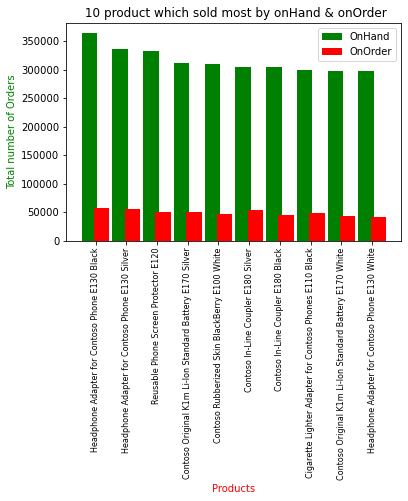

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()


x = max_OnHand["ProductName"]
z = max_OnHand["OnOrderQuantity"]
y = max_OnHand["OnHandQuantity"]

X = np.arange(len(max_OnHand["ProductName"]))
width = 0.4

b1 = ax.bar(X - width/2 , y, color = 'g', width = .5 , label = 'OnHand' )
b2 = ax.bar(X + width/2 , z, color = 'r', width = .5, label = 'OnOrder')
ax.set_ylabel("Total number of Orders", color = 'g')
ax.set_xlabel("Products", color = 'r')
ax.set_xticks(X)
ax.set_title(" 10 product which sold most by onHand & onOrder")
ax.set_xticklabels(x, rotation = 'vertical', size=8)
ax.legend()

plt.show()

### Ans 2.b - Top 10 product which sold least by OnHand & OnOrder 

In [23]:
# print top 10 productid sold least by onOrder.
result2 = sample_data2.groupby('ProductName', as_index=False).sum()
min_OnOrder = result2.nsmallest(10,"OnOrderQuantity")
min_OnOrder


,ProductName,OnHandQuantity,OnOrderQuantity
1140,Fabrikam Laptop8.9W E0880 Silver,1182,9
1121,Fabrikam Laptop10.1 M0101 Silver,1405,12
1888,Proseware Laptop15.4W M518 Black,1125,17
298,Adventure Works Laptop16 M1600 Black,1398,20
968,Contoso Washer & Dryer 27in L270 Blue,2736,179
971,Contoso Washer & Dryer 27in L270 Red,3125,182
1554,Litware Washer & Dryer 27in L420 Blue,2988,187
973,Contoso Washer & Dryer 27in L270 White,2910,200
1557,Litware Washer & Dryer 27in L420 White,3082,207
1555,Litware Washer & Dryer 27in L420 Green,3339,211


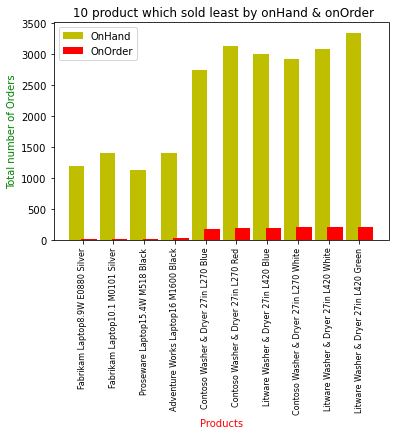

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()


x = min_OnOrder["ProductName"]
z = min_OnOrder["OnOrderQuantity"]
y = min_OnOrder["OnHandQuantity"]

X = np.arange(len(min_OnOrder["ProductName"]))
width = 0.4

b1 = ax.bar(X - width/2 , y, color = 'y', width = .5 , label = 'OnHand' )
b2 = ax.bar(X + width/2 , z, color = 'r', width = .5, label = 'OnOrder')
ax.set_ylabel("Total number of Orders", color = 'g')
ax.set_xlabel("Products", color = 'r')
ax.set_xticks(X)
ax.set_title(" 10 product which sold least by onHand & onOrder")
ax.set_xticklabels(x, rotation = 'vertical', size=8)
ax.legend()
plt.show()

### Q.3. In 2009 which storeId did highest sales.

In [28]:
##3 create new data sample which includes Unitcost and total order to find out total sale.
cost = [data_no_dupheader['UnitCost']]
totalOrder = [sample_data["Total Order"]]
sample_data3 = sample_data2.join(totalOrder).join(cost)
sample_data3.head()

,Date,StoreID,ProductID,ProductName,OnHandQuantity,OnOrderQuantity,Total Order,UnitCost
0,2009-01-03,1,6,Contoso 2G MP3 Player E200 Black,19,0,19,11.0000
1,2009-01-03,1,29,Contoso 32GB Video MP3 Player M3200 White,19,0,19,84.4900
2,2009-01-03,1,31,Contoso 32GB Video MP3 Player M3200 Orange,19,0,19,84.4900
3,2009-01-03,1,51,WWI 2GB Pulse Smart pen M100 Blue,19,0,19,91.9500
4,2009-01-03,1,54,WWI 4GB Video Recording Pen X200 Red,23,4,27,98.0700


In [29]:
## change datatype of unitcost column for further calculation
sample_data3["UnitCost"] = sample_data3["UnitCost"].astype("float")
sample_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547897 entries, 0 to 1563665
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Date             1547897 non-null  object 
 1   StoreID          1547897 non-null  object 
 2   ProductID        1547897 non-null  object 
 3   ProductName      1547897 non-null  object 
 4   OnHandQuantity   1547897 non-null  int32  
 5   OnOrderQuantity  1547897 non-null  int32  
 6   Total Order      1547897 non-null  int32  
 7   UnitCost         1547897 non-null  float64
dtypes: float64(1), int32(3), object(4)
memory usage: 97.0+ MB


In [30]:
### Create Sales column
sample_data3["Sales"] = sample_data3["Total Order"] * sample_data3["UnitCost"]
sample_data3.head()

,Date,StoreID,ProductID,ProductName,OnHandQuantity,OnOrderQuantity,Total Order,UnitCost,Sales
0,2009-01-03,1,6,Contoso 2G MP3 Player E200 Black,19,0,19,11.00,209.00
1,2009-01-03,1,29,Contoso 32GB Video MP3 Player M3200 White,19,0,19,84.49,1605.31
2,2009-01-03,1,31,Contoso 32GB Video MP3 Player M3200 Orange,19,0,19,84.49,1605.31
3,2009-01-03,1,51,WWI 2GB Pulse Smart pen M100 Blue,19,0,19,91.95,1747.05
4,2009-01-03,1,54,WWI 4GB Video Recording Pen X200 Red,23,4,27,98.07,2647.89


In [31]:
### get total sale of all storeids
result3 = sample_data3.groupby("StoreID").sum()
result3.head()

,OnHandQuantity,OnOrderQuantity,Total Order,UnitCost,Sales
StoreID,,,,,
1,117141,8732,125873,644794.77,13214710.71
10,137840,10219,148059,674945.51,13783430.41
100,122218,11395,133613,682156.32,13194220.12
101,115074,9078,124152,667453.95,13387886.02
102,121700,8462,130162,675293.66,13788011.65


In [32]:
### to check maximum sale value
Max_sale_Store = result3["Sales"].max()
Max_sale_Store

229655653.1699993

### Ans 3. StoreID 199 did the highest sale in 2009.

In [33]:
### to get StoreId for maximum sale
print (result3["Sales"][result3['Sales'] == (result3["Sales"].max())])


StoreID
199    2.296557e+08
Name: Sales, dtype: float64


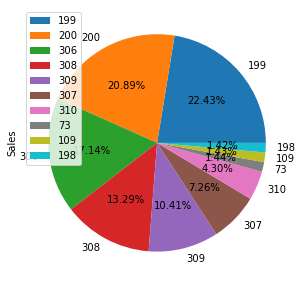

In [34]:
# visualization of Ans.8
import matplotlib.pyplot as plt
top10_store = result3.nlargest(10,"Sales")
plot = top10_store.plot.pie(y='Sales',figsize=(5,5), autopct = '%1.2f%%')